In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv(r'../data/ecommerce_dataset_10000.csv')
df.sample(10)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date
2578,CUST4909,Larry,Murphy,Female,Senior,2022-10-07,Japan,PROD102,Sony Headphones,Electronics,3,199,ORD12578,2024-11-14,Returned,Cash on Delivery,4,very bad,REV22578,2023-04-09
2936,CUST2902,Kelsey,Hall,Female,Senior,2022-11-10,Germany,PROD102,Sony Headphones,Electronics,1,199,ORD12936,2025-08-12,Delivered,Credit Card,1,very bad,REV22936,2023-07-27
2007,CUST5018,Randy,Pennington,Male,Teenagers,2021-11-12,India,PROD102,Sony Headphones,Electronics,5,199,ORD12007,2025-05-05,Shipped,PayPal,2,very bad,REV22007,2023-02-28
2554,CUST4320,Lisa,Henderson,Other,Adults,2020-11-11,India,PROD111,Lego Star Wars Set,Toys,1,59,ORD12554,2025-01-13,Returned,Credit Card,2,bad,REV22554,2025-02-21
1140,CUST3917,Bridget,Reynolds,Female,Adults,2022-02-25,Australia,PROD112,Barbie Dreamhouse,Toys,4,199,ORD11140,2023-12-26,Pending,Cash on Delivery,2,very good,REV21140,2025-07-17
2991,CUST1055,Marie,Scott,Male,Adults,2024-01-15,Japan,PROD110,Harry Potter Box Set,Books,3,80,ORD12991,2023-05-27,Shipped,Cash on Delivery,2,very good,REV22991,2023-03-07
4222,CUST2491,Joseph,Kelly,Male,Teenagers,2025-06-10,Brazil,PROD110,Harry Potter Box Set,Books,4,80,ORD14222,2023-10-29,Shipped,Cash on Delivery,3,good,REV24222,2025-03-15
2987,CUST2098,Michael,Rodriguez,Female,Adults,2022-12-19,Australia,PROD101,Samsung Galaxy S23,Electronics,1,899,ORD12987,2025-06-14,Returned,PayPal,2,average,REV22987,2023-05-23
3739,CUST4734,Sydney,Barker,Male,Teenagers,2024-02-19,UK,PROD104,Nike Air Max,Apparel,4,120,ORD13739,2025-05-26,Pending,Credit Card,4,bad,REV23739,2024-06-06
939,CUST2596,Edgar,Hanson,Other,Senior,2021-06-24,France,PROD104,Nike Air Max,Apparel,5,120,ORD10939,2022-11-06,Pending,PayPal,5,average,REV20939,2024-08-12


Análise estrutural do DataFrame

In [19]:
df.shape

(10000, 20)

In [5]:
df.isnull().sum()

customer_id       0
first_name        0
last_name         0
gender            0
age_group         0
signup_date       0
country           0
product_id        0
product_name      0
category          0
quantity          0
unit_price        0
order_id          0
order_date        0
order_status      0
payment_method    0
rating            0
review_text       0
review_id         0
review_date       0
dtype: int64

In [7]:
df.describe().round(2)

,quantity,unit_price,rating
count,10000.00,10000.00,10000.00
mean,3.00,246.65,2.99
std,1.42,282.61,1.41
min,1.00,25.00,1.00
25%,2.00,80.00,2.00
50%,3.00,129.00,3.00
75%,4.00,229.00,4.00
max,5.00,999.00,5.00


In [ ]:
# Verificação do tipo de cada coluna.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     10000 non-null  object
 1   first_name      10000 non-null  object
 2   last_name       10000 non-null  object
 3   gender          10000 non-null  object
 4   age_group       10000 non-null  object
 5   signup_date     10000 non-null  object
 6   country         10000 non-null  object
 7   product_id      10000 non-null  object
 8   product_name    10000 non-null  object
 9   category        10000 non-null  object
 10  quantity        10000 non-null  int64 
 11  unit_price      10000 non-null  int64 
 12  order_id        10000 non-null  object
 13  order_date      10000 non-null  object
 14  order_status    10000 non-null  object
 15  payment_method  10000 non-null  object
 16  rating          10000 non-null  int64 
 17  review_text     10000 non-null  object
 18  review_

Após essa primera análise de reconhecimento do DataFrame, serão feitos duas principais adições visando futuras análises:

- Inclusão de uma nova coluna chamada receita_total, buscando ter uma visão mais clara da receita por pedido e também geral.
- Alterar as colunas 'signup_date' e 'review_date' para o formato de Datas.

In [23]:
df['receita_total'] = df['quantity'] * df['unit_price']

In [21]:
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')

In [22]:
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     10000 non-null  object        
 1   first_name      10000 non-null  object        
 2   last_name       10000 non-null  object        
 3   gender          10000 non-null  object        
 4   age_group       10000 non-null  object        
 5   signup_date     10000 non-null  datetime64[ns]
 6   country         10000 non-null  object        
 7   product_id      10000 non-null  object        
 8   product_name    10000 non-null  object        
 9   category        10000 non-null  object        
 10  quantity        10000 non-null  int64         
 11  unit_price      10000 non-null  int64         
 12  order_id        10000 non-null  object        
 13  order_date      10000 non-null  object        
 14  order_status    10000 non-null  object        
 15  pay

In [ ]:
# Para que todas as colunas do DataFrame sejam visualizadas, definimos que limite de colunas apresentadas para as 21 que o DF possui

pd.set_option('display.max_columns', 21)

In [29]:
# Padronização do estilo gráfico que será utilizado

plt.style.use('seaborn-v0_8')

In [44]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,...,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
251,CUST1101,Alexander,Hahn,Female,Adults,2023-05-08,Japan,PROD100,iPhone 14,Electronics,...,999,ORD10251,2023-01-29,Returned,PayPal,3,bad,REV20251,2023-01-20,999
1719,CUST1382,Gina,Smith,Other,Senior,2020-10-08,China,PROD108,Fitbit Versa 3,Electronics,...,229,ORD11719,2023-09-05,Shipped,Cash on Delivery,1,good,REV21719,2024-12-23,1145
7819,CUST5974,Ryan,Miller,Female,Adults,2021-05-14,Germany,PROD111,Lego Star Wars Set,Toys,...,59,ORD17819,2025-06-23,Pending,PayPal,1,bad,REV27819,2023-08-10,236
1318,CUST5655,Paul,Young,Female,Teenagers,2023-11-12,France,PROD105,Adidas Running Shoes,Apparel,...,110,ORD11318,2024-10-15,Pending,Cash on Delivery,3,good,REV21318,2023-11-21,440
5047,CUST5801,Michael,Ball,Male,Adults,2022-06-29,India,PROD110,Harry Potter Box Set,Books,...,80,ORD15047,2025-04-08,Pending,Credit Card,3,bad,REV25047,2025-05-02,160


Análise Exploratória dos Dados

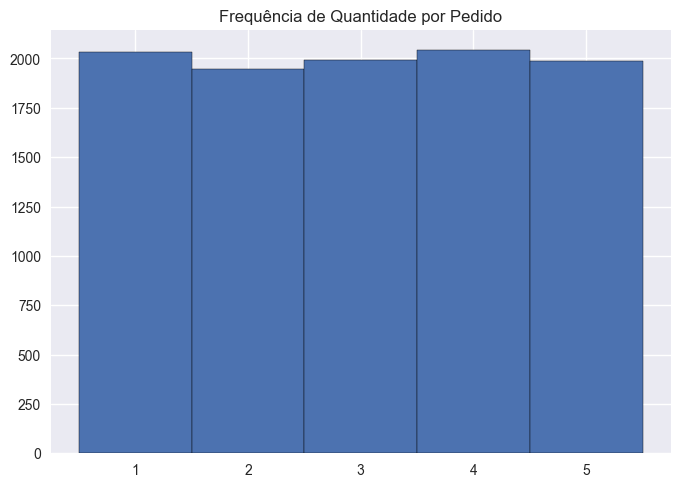

In [41]:
# Histograma da Frequencia da quantidade de produtos selecionados por pedido, com correção da posição e contorno das colunas (bins e edgecolor) para uma melhor visualização

_ = plt.hist(df['quantity'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
_ = plt.title('Frequência de Quantidade por Pedido')
plt.show()

In [42]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
847,CUST1958,Kathryn,Duarte,Other,Adults,2022-08-19,Canada,PROD109,Kindle Paperwhite,Books,3,129,ORD10847,2024-02-18,Pending,Cash on Delivery,2,average,REV20847,2022-10-29,387
8254,CUST3444,Thomas,Diaz,Other,Senior,2025-04-19,China,PROD101,Samsung Galaxy S23,Electronics,4,899,ORD18254,2024-02-09,Shipped,Credit Card,2,very good,REV28254,2023-08-23,3596
3493,CUST1423,Keith,Barnett,Male,Senior,2023-05-01,Germany,PROD113,Wilson Tennis Racket,Sports,5,149,ORD13493,2023-05-26,Cancelled,Credit Card,5,average,REV23493,2024-09-28,745
6307,CUST1584,Taylor,Floyd,Female,Senior,2021-10-30,Japan,PROD114,Yoga Mat,Sports,2,25,ORD16307,2022-08-29,Shipped,Cash on Delivery,4,good,REV26307,2024-09-04,50
8705,CUST3423,David,Miller,Other,Senior,2025-08-04,Germany,PROD109,Kindle Paperwhite,Books,4,129,ORD18705,2025-02-24,Shipped,Cash on Delivery,1,average,REV28705,2025-07-10,516


In [48]:
df.shape

(10000, 21)

In [ ]:
# Quantidade de clientes únicos

df['customer_id'].nunique()

4327

Os 10.000 pedidos registrados no período foram feitos por 4.327 clientes únicos. Com isso, vamos identificar clientes com os maiores valores gastos no período.

In [63]:
# Clientes com mais transações feitas no periodo

df['customer_id'].value_counts().head(10).reset_index()

,customer_id,count
0,CUST1244,9
1,CUST5023,8
2,CUST3967,7
3,CUST3759,7
4,CUST2192,7
5,CUST5726,7
6,CUST2066,7
7,CUST1628,7
8,CUST2896,7
9,CUST3798,7


In [ ]:
# Clientes com maiores valores gastos no período

top_clientes = df.groupby('customer_id')['receita_total'].sum().sort_values(ascending=False).head(10).reset_index()
top_clientes

,customer_id,receita_total
0,CUST3556,13985
1,CUST4526,12567
2,CUST2419,12078
3,CUST2149,11515
4,CUST1441,11288
5,CUST3955,10989
6,CUST5377,10413
7,CUST4434,10389
8,CUST4765,10364
9,CUST5014,10289


In [ ]:
# Abaixo temos as transações e informações do cliente que mais gastou no período. O código também serve como filtro, bastando apenas substituir o ID para visualizar as transações feitas por um cliente no período.

filtro_id = df[df['customer_id'] == 'CUST3556']
filtro_id

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
4549,CUST3556,Beverly,Gallagher,Male,Senior,2023-04-17,Japan,PROD100,iPhone 14,Electronics,1,999,ORD14549,2023-04-15,Shipped,Credit Card,4,very bad,REV24549,2024-10-09,999
7335,CUST3556,Beverly,Gallagher,Male,Senior,2023-04-17,Japan,PROD101,Samsung Galaxy S23,Electronics,5,899,ORD17335,2024-08-24,Cancelled,PayPal,3,bad,REV27335,2024-02-08,4495
8350,CUST3556,Beverly,Gallagher,Male,Senior,2023-04-17,Japan,PROD101,Samsung Galaxy S23,Electronics,5,899,ORD18350,2025-04-14,Cancelled,PayPal,2,very good,REV28350,2023-08-23,4495
9054,CUST3556,Beverly,Gallagher,Male,Senior,2023-04-17,Japan,PROD100,iPhone 14,Electronics,4,999,ORD19054,2024-06-24,Pending,Credit Card,3,average,REV29054,2025-05-20,3996


In [59]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
2680,CUST1204,Jennifer,Dunn,Female,Teenagers,2021-03-26,India,PROD106,Instant Pot,Home & Kitchen,3,99,ORD12680,2025-04-16,Returned,PayPal,2,very bad,REV22680,2025-06-22,297
5730,CUST4714,Deborah,Browning,Male,Adults,2024-04-17,France,PROD101,Samsung Galaxy S23,Electronics,3,899,ORD15730,2024-09-27,Returned,Credit Card,2,very bad,REV25730,2023-05-18,2697
2350,CUST3647,James,Mendoza,Female,Senior,2023-08-31,Australia,PROD113,Wilson Tennis Racket,Sports,4,149,ORD12350,2024-12-30,Cancelled,Credit Card,5,very good,REV22350,2024-09-23,596
4046,CUST3703,Andrea,Graham,Other,Adults,2025-05-03,China,PROD114,Yoga Mat,Sports,1,25,ORD14046,2025-01-22,Shipped,PayPal,5,average,REV24046,2022-11-05,25
6032,CUST3858,Gabrielle,Barnes,Female,Adults,2022-09-15,Brazil,PROD108,Fitbit Versa 3,Electronics,5,229,ORD16032,2025-04-06,Returned,PayPal,3,very bad,REV26032,2023-09-22,1145


Análises de indicardores por País.

In [113]:
transacoes_paises = df['country'].value_counts().head(10).reset_index()
transacoes_paises = transacoes_paises.rename(columns={'count': 'qtde_transacoes'})

receita_paises = df.groupby('country')['receita_total'].sum().sort_values(ascending=False).reset_index()

ticket_paises = df.groupby('country')['receita_total'].mean().sort_values(ascending=False).reset_index()
ticket_paises = ticket_paises.rename(columns={'receita_total': 'ticket_medio'})

In [114]:
from IPython.display import display

display(transacoes_paises)
display(receita_paises)
display(ticket_paises)

,country,qtde_transacoes
0,France,1060
1,China,1054
2,Australia,1043
3,India,1036
4,Brazil,1019
5,Canada,997
6,USA,987
7,Japan,976
8,UK,943
9,Germany,885


,country,receita_total
0,China,815789
1,France,810303
2,Japan,777673
3,USA,767017
4,India,759619
5,Australia,745407
6,Brazil,743066
7,Canada,719928
8,UK,676570
9,Germany,635391


,country,ticket_medio
0,Japan,796.796107
1,USA,777.119554
2,China,773.993359
3,France,764.436792
4,India,733.222973
5,Brazil,729.210991
6,Canada,722.094283
7,Germany,717.955932
8,UK,717.465536
9,Australia,714.675935


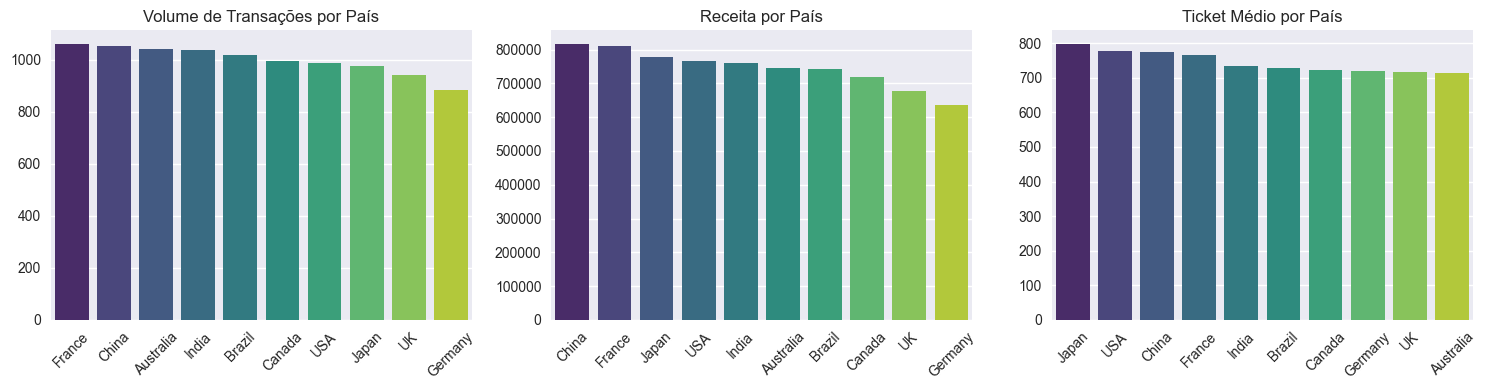

In [130]:
contagem_paises = df['country'].value_counts().head(10).reset_index()
receita_paises = df.groupby('country')['receita_total'].sum().sort_values(ascending=False).reset_index()
ticket_paises = df.groupby('country')['receita_total'].mean().sort_values(ascending=False).reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

sns.barplot(data=contagem_paises, x='country', y='count', hue='country', palette='viridis', ax=ax1, legend=False)
ax1.set_title('Volume de Transações por País')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(data=receita_paises, x='country', y='receita_total', hue='country', palette='viridis', ax=ax2, legend=False)
ax2.set_title('Receita por País')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', rotation=45)

sns.barplot(data=ticket_paises, x='country', y='receita_total', hue='country', palette='viridis', ax=ax3, legend=False)
ax3.set_title('Ticket Médio por País')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Os três gráficos oferecem importantes informações sobre o comportamento de compra em diferentes países. A principal conclusão que se pode tirar é que volume de transações e ticket médio não andam exatamente juntos, e isso exige estratégias diferentes.

Aqui estão alguns insights e possíveis tomadas de decisão:

### Insights (O que os dados nos dizem)

**Liderança em Volume e Receita:** A China e a França são os mercados de maior volume e receita. Isso indica que eles são os mercados mais importantes e maduros para o negócio.

**Valor por Transação:** O Japão e os EUA têm o ticket médio mais alto, mesmo com um volume de transações e receita total menores. Isso sugere que os clientes nesses países compram produtos mais caros por transação.

**Desafio de Volume vs. Valor:** Países como o Reino Unido (UK) e a Austrália têm um volume de transações similar ao do Japão, mas com um ticket médio muito mais baixo.

### Tomadas de Decisão (Como usar os dados)

**Estratégia para o Japão e os EUA:** O foco não deve ser apenas em aumentar o número de transações, mas sim em campanhas de up-selling e cross-selling (venda de produtos complementares) para os clientes existentes, promovendo produtos de maior valor. O potencial de receita nesses mercados é alto.

**Estratégia para a China e a França:** Como são mercados de alto volume e receita, a estratégia deve ser de retenção e fidelização. A empresa pode oferecer programas de pontos ou promoções exclusivas para manter a liderança.

**Estratégia para o Reino Unido e a Austrália:** O foco deve ser em aumentar o número de itens por transação ou em promoções de volume, como "leve 3, pague 2", para elevar o ticket médio e, consequentemente, a receita total.

Em resumo, a análise conjunta dos três gráficos permite uma estratégia de mercado muito mais segmentada e eficaz do que olhar para apenas uma métrica isoladamente.

In [117]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
6869,CUST2284,Heather,Foster,Male,Teenagers,2025-07-14,Germany,PROD101,Samsung Galaxy S23,Electronics,5,899,ORD16869,2025-01-08,Delivered,Credit Card,5,average,REV26869,2024-05-11,4495
7639,CUST5676,Kaitlyn,Taylor,Male,Senior,2025-03-07,UK,PROD111,Lego Star Wars Set,Toys,1,59,ORD17639,2024-05-12,Returned,PayPal,3,good,REV27639,2025-03-16,59
4854,CUST2893,Edward,Cannon,Male,Adults,2023-12-16,China,PROD100,iPhone 14,Electronics,4,999,ORD14854,2023-09-18,Cancelled,PayPal,4,good,REV24854,2025-05-05,3996
4262,CUST1046,Stephen,Cooper,Female,Adults,2025-07-28,China,PROD108,Fitbit Versa 3,Electronics,4,229,ORD14262,2023-12-08,Pending,PayPal,4,very bad,REV24262,2024-08-15,916
9923,CUST1779,Felicia,Hoffman,Female,Adults,2024-05-30,Brazil,PROD111,Lego Star Wars Set,Toys,5,59,ORD19923,2024-10-29,Shipped,Credit Card,4,very good,REV29923,2023-03-14,295


Análise de Produtos e Categorias de Produtos.

In [142]:
# Contagem de 

qtde_categoria = df['category'].value_counts().reset_index()
qtde_categoria = qtde_categoria.rename(columns={'count': 'qtde_vendida'})
qtde_categoria

,category,qtde_vendida
0,Electronics,2616
1,Apparel,2047
2,Home & Kitchen,1391
3,Books,1334
4,Toys,1314
5,Sports,1298


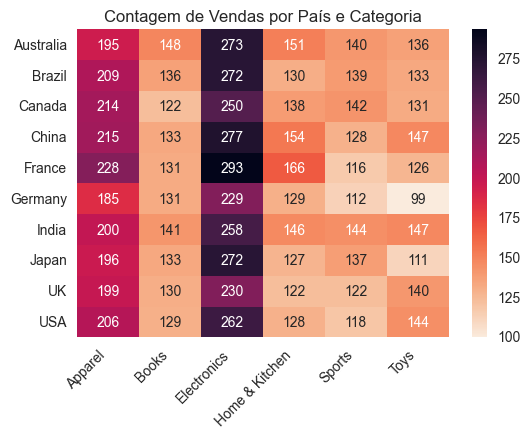

In [ ]:
# Aqui cruzamos as colunas de Países x Categoria de Produtos, buscando observar onde se concentra o maior volume de vendas nessa relação.

df_categoria = pd.crosstab(index=df['country'], columns=df['category'])

plt.figure(figsize=(6, 4))
sns.heatmap(df_categoria, annot=True, fmt='d', cmap='rocket_r')  # fmt é a abreviação de "format" (formato). O 'd' significa "decimal" e garante que os números sejam exibidos como inteiros.
                                                                 # annot é a abreviação de "annotate". Ao definir annot=True, o Seaborn é instruido a exibir o valor numérico de cada célula diretamente no mapa de calor.
plt.title('Contagem de Vendas por País e Categoria')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [140]:
# Quantidade vendida de cada produto

qtde_produtos = df['product_name'].value_counts().reset_index()
qtde_produtos = qtde_produtos.rename(columns={'count': 'qtde_vendida'})
qtde_produtos

,product_name,qtde_vendida
0,Dyson Vacuum,730
1,Levi's Jeans,693
2,Sony Headphones,689
3,Adidas Running Shoes,680
4,Harry Potter Box Set,676
5,Nike Air Max,674
6,Instant Pot,661
7,Wilson Tennis Racket,661
8,Fitbit Versa 3,659
9,Lego Star Wars Set,658


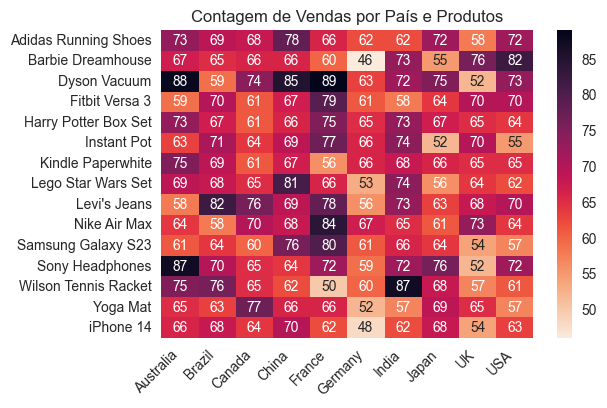

In [157]:
# Assim como no heatmap das categorias de produtos, aqui visualizamos a concentração do volume de vendas dos produtos em si por País.

df_produtos = pd.crosstab(index=df['product_name'], columns=df['country'])

plt.figure(figsize=(6, 4))
sns.heatmap(df_produtos, annot=True, fmt='d', cmap='rocket_r')

plt.title('Contagem de Vendas por País e Produtos')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [135]:
df.sample(5)

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date,receita_total
6700,CUST3078,Allison,Morrow,Other,Adults,2020-08-31,Australia,PROD105,Adidas Running Shoes,Apparel,1,110,ORD16700,2025-03-07,Pending,Credit Card,2,average,REV26700,2025-02-11,110
8096,CUST4088,Steve,Levine,Female,Adults,2022-07-06,Brazil,PROD114,Yoga Mat,Sports,1,25,ORD18096,2025-08-01,Delivered,Credit Card,5,bad,REV28096,2025-01-11,25
5039,CUST3224,Joyce,King,Male,Adults,2024-07-07,Brazil,PROD105,Adidas Running Shoes,Apparel,4,110,ORD15039,2022-12-03,Delivered,Cash on Delivery,3,average,REV25039,2023-08-03,440
9118,CUST2957,Charlotte,Ruiz,Male,Senior,2024-04-27,Canada,PROD107,Dyson Vacuum,Home & Kitchen,3,399,ORD19118,2024-05-10,Pending,Cash on Delivery,2,very bad,REV29118,2025-03-13,1197
9739,CUST3184,Thomas,Brown,Female,Senior,2020-12-18,Canada,PROD107,Dyson Vacuum,Home & Kitchen,3,399,ORD19739,2022-10-09,Delivered,PayPal,4,good,REV29739,2022-09-23,1197


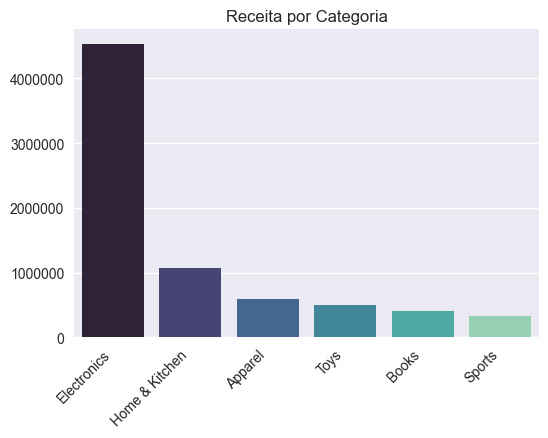

In [158]:
# Receita por Categoria

receita_categoria = df.groupby('category')['receita_total'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=receita_categoria, x='category', y='receita_total', hue='category', palette='mako')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Receita por Categoria')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()